Dataset Head:
   CustomerID   Item        Comment  Label  Sentiment
0           1  Apple          fresh      1          1
1           2  Apple   good product      1          1
2           3  Apple         lively      1          1
3           4  Apple  straight farm      1          1
4           5  Apple  great quality      1          1

Missing Values:
CustomerID    0
Item          0
Comment       0
Label         0
Sentiment     0
dtype: int64


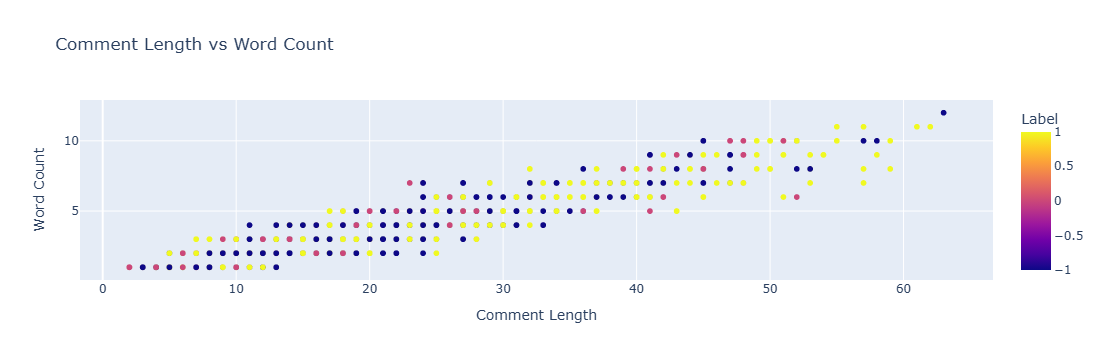

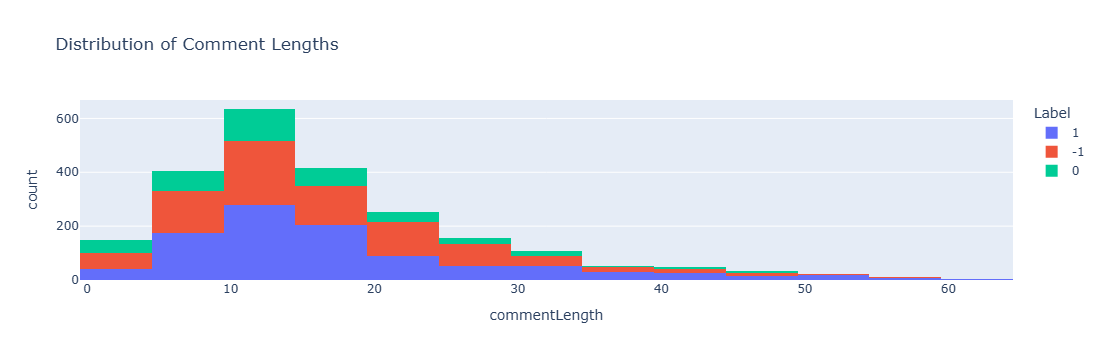

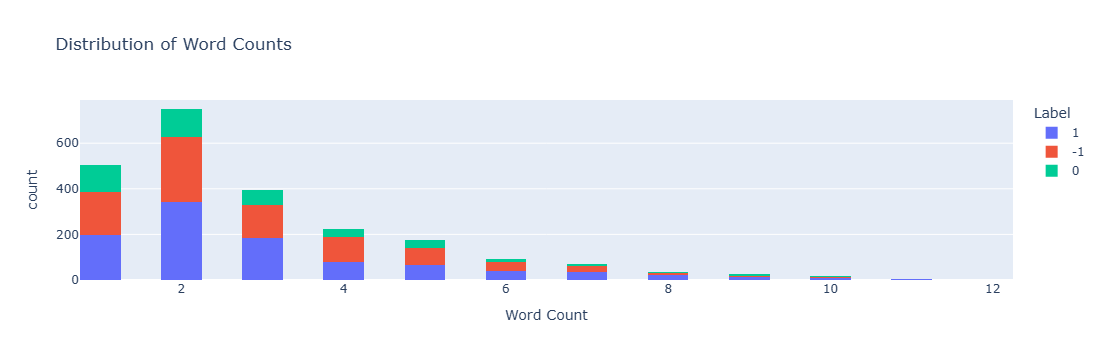


Top 20 Bigrams:
                  count
taste good           27
good quality         26
poor quality         24
sweet juicy          20
value money          16
good taste           15
fresh juicy          14
perfectly ripe       13
expected better      13
waste money          13
fresh sweet          13
raw mango            12
highly recommend     11
good product         11
wo buy               10
fresh delicious      10
great taste           9
good condition        9
small size            9
fruit salad           8


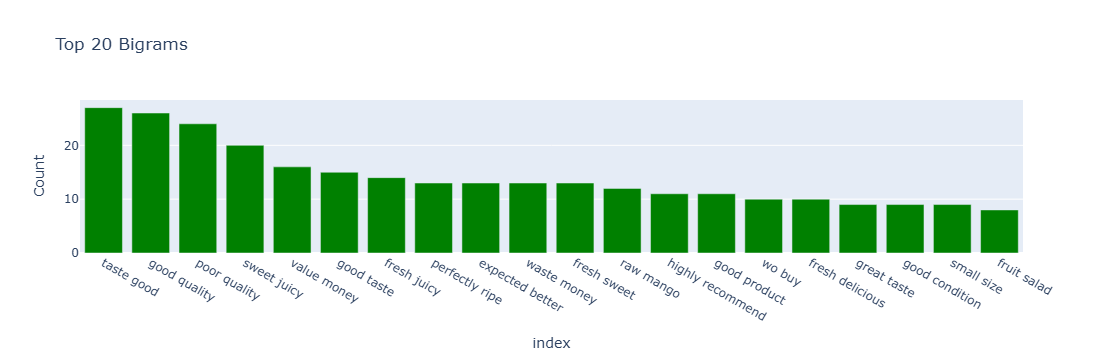


Top 20 Trigrams:
                         count
great value money            6
amazing quality sweet        6
expected better quality      6
juicy taste quite            5
sweet juicy loved            5
sour lacked sweetness        5
fresh tasted good            5
decent flavor sweet          5
taste quite mild             5
better quality price         4
size small price             4
fresh good quality           4
packet strawberry bad        4
quality sweet juicy          4
super sweet juicy            4
dry lacked flavor            4
incredibly fresh juicy       4
underripe hard eat           4
incredibly sweet juicy       4
row form eatable             3


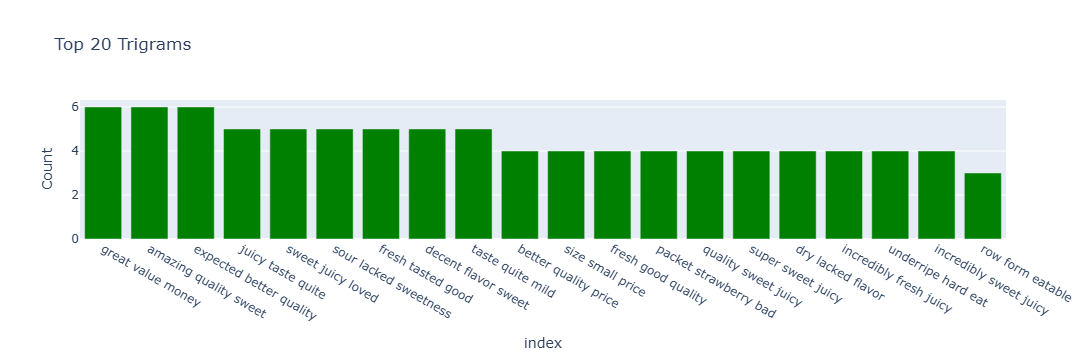

In [25]:
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
# Load your dataset
file_path = r"C:\Users\eswar\OneDrive\Desktop\Pictures\Documents\FDS_PROJECT\FDS_TotalDataSet22.csv" # Update this with your CSV file path
df = pd.read_csv(file_path)
# Basic EDA
print("Dataset Head:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
# Add comment length and word count
df['comment_length'] = df['Comment'].apply(len)
df['word_count'] = df['Comment'].apply(lambda x: len(x.split()))
# Interactive scatter plot for comment length vs word count
fig = px.scatter(df, x='comment_length', y='word_count',color='Label',title='Comment Length vs Word Count',labels={'comment_length': 'Comment Length','word_count': 'Word Count'},hover_data=['Comment'])
fig.show()
# Interactive histogram for comment lengths
fig_length = px.histogram(df, x='comment_length', nbins=30,
color='Label',
 title='Distribution of Comment Lengths',
labels={'comment_length': 'commentLength'})
fig_length.show()
# Interactive histogram for word counts
fig_word_count = px.histogram(df, x='word_count', nbins=30,
color='Label',
 title='Distribution of Word Counts',
labels={'word_count': 'Word Count'})
fig_word_count.show()
# N-gram analysis function
def get_ngrams(comments, n=2, top_n=20): # Change top_n to 20
 vectorizer = CountVectorizer(ngram_range=(n, n),stop_words='english')
 ngrams = vectorizer.fit_transform(comments)
 ngram_counts = ngrams.sum(axis=0)
 ngram_features = vectorizer.get_feature_names_out()

 # Create a DataFrame of n-grams and their counts
 ngram_df = pd.DataFrame(ngram_counts.A1, index=ngram_features,columns=['count'])
 return ngram_df.sort_values(by='count',ascending=False).head(top_n)
# Generate and display bigrams
comments = df['Comment'].dropna()
bigrams = get_ngrams(comments, n=2, top_n=20) # Get top 20 bigrams
print("\nTop 20 Bigrams:")
print(bigrams)
# Bar plot for bigrams
fig_bigrams = px.bar(bigrams, x=bigrams.index, y='count',color_discrete_sequence=['green'],title='Top 20 Bigrams',labels={'x': 'Bigrams', 'count': 'Count'})
fig_bigrams.show()
# Generate and display trigrams
trigrams = get_ngrams(comments, n=3, top_n=20) # Get top 20 trigrams
print("\nTop 20 Trigrams:")
print(trigrams)
# Bar plot for trigrams
fig_trigrams = px.bar(trigrams, x=trigrams.index, y='count',color_discrete_sequence=['green'],
 title='Top 20 Trigrams',
labels={'x': 'Trigrams', 'count': 'Count'})
fig_trigrams.show()
